   # Computational Statistics: Problem set 5
   ## Group 5
### Ozodbek Ozodov, Nargiz Ahmadova, Neda Mohamadi

# Exercise 1

### Data generating process

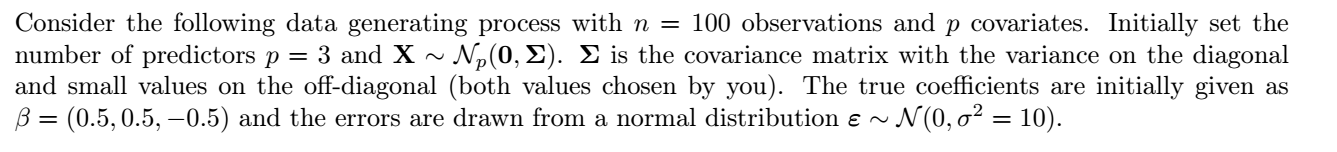

##### Let's start with cleaning the environment and installing\loading necessary packages

In [31]:
rm(list=ls())
library(glmnet)
library(ggplot2)
library(MASS)
library(ggplot2)
#install.packages("ggrepel")
library(dplyr)

In [32]:
### Variance-covariance matrix

Var1=2
Var2=2
Var3=1
Corr12=0.05
Corr13=0.02
Corr23=0.03

Cov12=Corr12*sqrt(Var1)*sqrt(Var2)
Cov13=Corr13*sqrt(Var1)*sqrt(Var3)
Cov23=Corr23*sqrt(Var2)*sqrt(Var3)
Variance.cov=matrix(c(Var1,Cov12,Cov13,Cov12,Var2,Cov23,Cov13,Cov23,Var3),nrow=3,ncol=3,byrow=TRUE)
#Variance.cov



### After we chose variance and correlation coefficients, we created the following variance-covariance matrix. This will be used in the data generating process to create multivariate normal distribution

In [33]:
Variance.cov

2.00000000,0.10000000,0.02828427
0.10000000,2.00000000,0.04242641
0.02828427,0.04242641,1.00000000


In [34]:
### data generating process
set.seed(123)
beta=c(0.5,0.5,-0.5)
n=100
p=3 ## number of covariates
mydata=function(n,mu,VarCov, mu.u,sigma.u){
  
  x=mvrnorm(n,mu,VarCov)
  error=rnorm(n, mu.u, sqrt(sigma.u))
  y=x%*%beta+error
  data=cbind(x,y)
  return(data)
}

data=mydata(n=100,mu=rep(0,3),VarCov=Variance.cov,mu.u=0, sigma.u=10)
colnames(data)=c("X1", "X2", "X3", "Y")
head(data)

X=data[,-4]
Y=data[,4]


X1,X2,X3,Y
-0.1747142,1.17826910,2.2413742,-2.8807040
0.4545387,-0.06566584,1.3206748,-2.8461124
-1.8275193,-1.34966271,-0.3632717,-4.3748752
-0.4248461,0.24379785,0.5425717,-3.6901492
-1.0521321,0.80873374,-0.4075222,-1.3003579
-1.7851049,-1.69776809,-0.5872162,-0.4005479


## a) Write a function to calculate the ridge regression estimator in closed form (depending on λ) as discussed in the lecture.

### As we discussed, the derived equation for calculating ridge regression looks like the following:


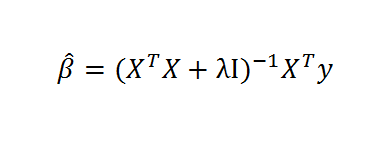

In [35]:
### ridge regression as a function of lambda, X and Y based on the formula: (X'X+\Lambda I)X'Y

ridge.mod=function(lambda,X,Y){
  solve(t(X)%*%X+lambda*diag(3))%*%t(X)%*%Y
}


# b) ridge coefficient estimates for each value of lambda

In [36]:
grid <- c(0, 10^ seq (-2, 4, length = 99))

In [37]:
grid[c(1,10:20,100)]

[1] 0.000000e+00 3.088844e-02 3.556480e-02 4.094915e-02 4.714866e-02
 [6] 5.428675e-02 6.250552e-02 7.196857e-02 8.286428e-02 9.540955e-02
[11] 1.098541e-01 1.264855e-01 1.000000e+04

In [38]:
ridge.coef=matrix(rep(NA,p*length(grid)),nrow=3,ncol=length(grid))
for (i in 1:length(grid)){
  ridge.coef[,i]=ridge.mod(lambda=grid[i],X=X,Y=Y)
}
colnames(ridge.coef) <- c("OLS", round(grid[2:100],3))
ridge.coef


OLS,0.01,0.012,0.013,0.015,0.018,0.02,0.023,0.027,0.031,...,2811.769,3237.458,3727.594,4291.934,4941.713,5689.866,6551.286,7543.12,8685.114,10000
0.6720380,0.6719951,0.6719887,0.6719812,0.6719726,0.6719627,0.6719513,0.6719381,0.6719230,0.6719056,...,0.03835843,0.03357873,0.02936569,0.02565899,0.02240306,0.019547182,0.017045342,0.014856062,0.012942139,0.011270351
0.5185674,0.5185294,0.5185236,0.5185170,0.5185093,0.5185005,0.5184904,0.5184787,0.5184653,0.5184499,...,0.02566930,0.02244739,0.01961300,0.01712353,0.01494012,0.013027519,0.011353964,0.009890978,0.008613137,0.007497826
-0.6860211,-0.6859352,-0.6859222,-0.6859072,-0.6858900,-0.6858701,-0.6858473,-0.6858210,-0.6857907,-0.6857558,...,-0.01670638,-0.01453905,-0.01264932,-0.01100255,-0.00956819,-0.008319345,-0.007232398,-0.006286640,-0.005463940,-0.004748442


 The output of manually-created function consists of 3 rows and 100 columns. They represent the coefficient estimates for all three covariates across lambdas from 0 to 100

The plot shows the coefficient estimates for all three betas derived from ridge.mode user-defined function.   

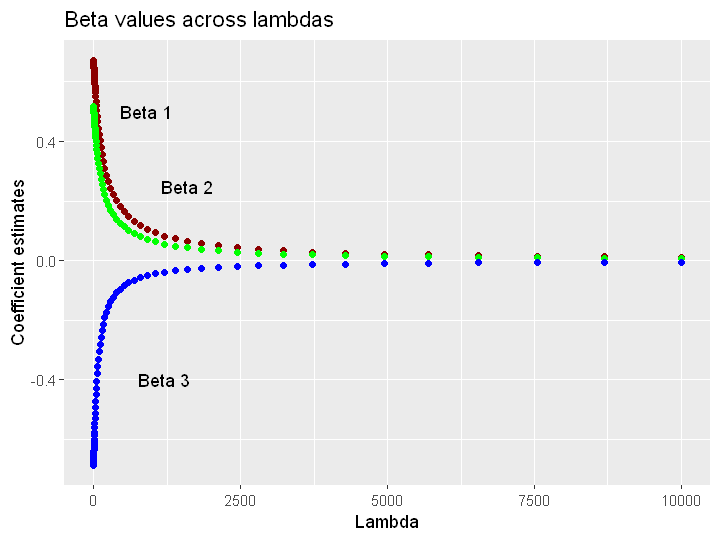

In [39]:
df=data.frame("lambda"=grid, "beta1"=ridge.coef[1,],"beta2"=ridge.coef[2,],"beta3"=ridge.coef[3,])



ggp <- ggplot(df, aes(x=lambda) ) + 
  geom_point(aes(y = beta1), color = "darkred") + 
  geom_point(aes(y = beta2),color="green" ) +
  geom_point(aes(y = beta3), color="blue") #+
#   geom_line(aes(y = beta1), color = "darkred") + 
#   geom_line(aes(y = beta2),color="green" ) +
#   geom_line(aes(y = beta3), color="blue")
  
ggp +  annotate("text", x=900, y=0.50, label="Beta 1")+
        annotate("text", x=1600, y=0.25, label="Beta 2")+
        annotate("text", x=1200, y=-0.40, label="Beta 3")+
ggtitle("Beta values across lambdas")+
xlab("Lambda")+
ylab("Coefficient estimates")+theme_grey()

#options(repr.plot.width=4, repr.plot.height=3)


      
  

In [40]:
#### Side note: glmnet package versus closed form solution
grid.new=10^ seq (4, -2, length = 100)
ridge=glmnet(X,Y,alpha=0,lambda=grid.new)



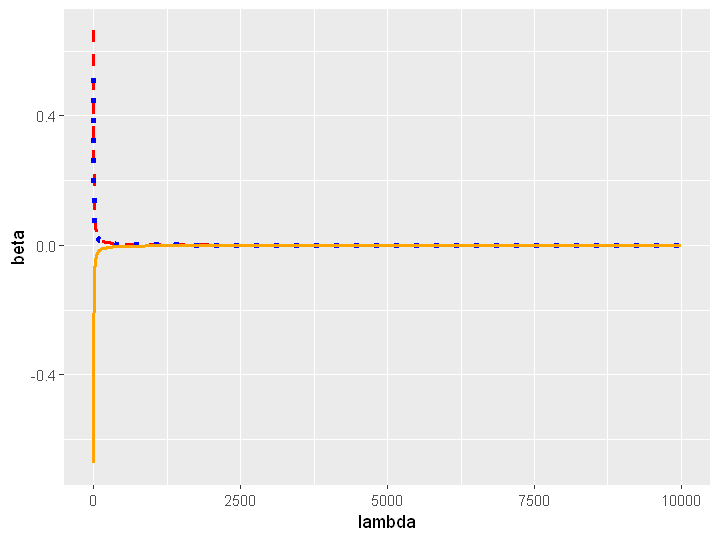

In [41]:

df=data.frame("lambda"=grid.new, "beta1"=coef(ridge)[2,],"beta2"=coef(ridge)[3,],"beta3"=coef(ridge)[4,])
ggplot(df, aes(x=lambda,y=beta)) + 
  geom_line(aes(y = beta1),linetype="dashed",color = "red", size=1)+ 
  geom_line(aes(y = beta2),linetype="dotted",color = "blue",size=1.5)+
  geom_line(aes(y = beta3),color = "orange",size=1)+
  theme_grey()
  options(repr.plot.width=6, repr.plot.height=4.5)

In [42]:
#### some adjustments to glmnet function to get similar results
sd_y <- sqrt(var(Y)*(n-1)/n)
grid.new <- (sqrt(sd_y)/100)* 10^seq (4, -2, length = 100)   ### lambda is adjusted
ridge.glm <- glmnet (X, Y, alpha = 0, lambda = grid.new, standardize=FALSE,intercept=FALSE) 


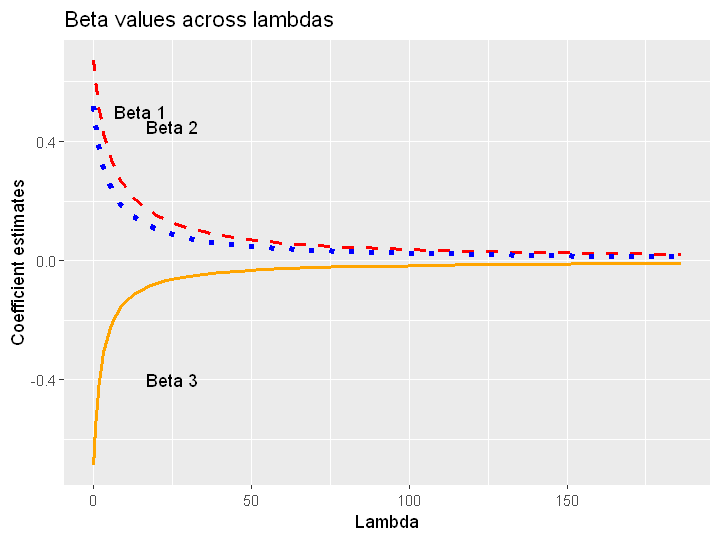

In [43]:

df=data.frame("lambda"=grid.new, "beta1"=coef(ridge.glm)[2,],"beta2"=coef(ridge.glm)[3,],"beta3"=coef(ridge.glm)[4,])
ggplot(df, aes(x=lambda,y=beta)) + 
  geom_line(aes(y = beta1),linetype="dashed",color = "red", size=1)+ 
  geom_line(aes(y = beta2),linetype="dotted",color = "blue",size=1.5)+
  geom_line(aes(y = beta3),color = "orange",size=1)+
    annotate("text", x=15, y=0.50, label="Beta 1")+
        annotate("text", x=25, y=0.45, label="Beta 2")+
        annotate("text", x=25, y=-0.40, label="Beta 3")+
ggtitle("Beta values across lambdas")+
xlab("Lambda")+
ylab("Coefficient estimates")
    
  



### c) Generate a test sample of the same size and calculate the prediction error and the training error for each value of λ and for the OLS estimate. Show your results graphically.

To create the subset for training data we split the data into two equal subsets by creating random vector. Elements corresponding TRUE values are the training data, and FALSE are the test data.

In [44]:

# set.seed(12)
train=sample(1:nrow(X),nrow(X)/2)
test=-train
Y.test=Y[test]
# Storage for training ridge coefficients for each lambda
ridge.coef.train=matrix(rep(NA,p*length(grid)),nrow=3,ncol=length(grid))

for (i in 1:length(grid)){
  ridge.coef.train[,i]=ridge.mod(lambda=grid[i],X=X[train,],Y=Y[train])
}
# Storage for both errors for each lambdas
prediction.error=c(rep(NA,length(grid)))
training.error=c(rep(NA,length(grid)))

# calculating errors for each lambda
for (i in 1:length(grid)){
  prediction.error[i]=mean((Y.test-X[test,]%*%ridge.coef.train[,i])^2)
  training.error[i]=mean((Y[train]-X[train,]%*%ridge.coef.train[,i])^2)
}


# prediction.error
# training.error


### Prediction and training error

In [45]:
min(prediction.error)
which(prediction.error==min(prediction.error))
grid[which(prediction.error==min(prediction.error))]


[1] 13.71531

[1] 1

[1] 0

In [46]:
print("Prediction error") 
min(prediction.error)
### index corresponding to the minimum prediction error
print("Lambda index containing minimum error for")
which(prediction.error==min(prediction.error))
#### lambda corresponding to the minimum prediction error
print("Lambda value for minimum prediction error")
grid[which(prediction.error==min(prediction.error))]

#x.axis=seq(0, 10000)
plot_data=data.frame("prediction.error"=prediction.error, "training.error"=training.error) #, x.axis="x.axis")




[1] "Prediction error"


[1] 13.71531

[1] "Lambda index containing minimum error for"


[1] 1

[1] "Lambda value for minimum prediction error"


[1] 0

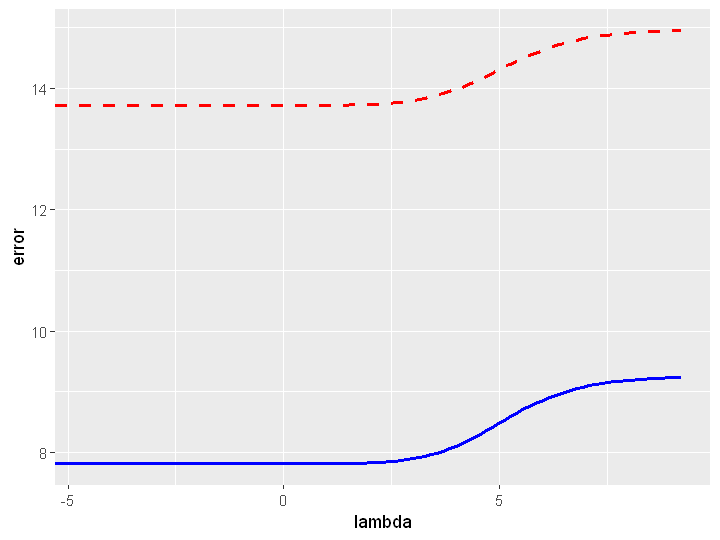

In [47]:

data.f=data.frame("lambda"=log(grid), "test.error"=prediction.error,"train.error"=training.error)
ggplot(data.f, aes(x=lambda,y=error, color=data.f)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
  geom_line(aes(y = train.error),color = "blue", size=1)+ 
  theme_grey()

# annotate("text", x=12, y=12, label="  Prediction error")+
# annotate("text", x=12, y=8.7, label=" Training error")+ 
# ggtitle(" Prediction and training errors")+
# xlab("Lambda")+ylab("Error") 

  
#   options(repr.plot.width=6, repr.plot.height=4.5)


## The same training and prediction error with lambda itself, without taking log of it like in the previous plot.

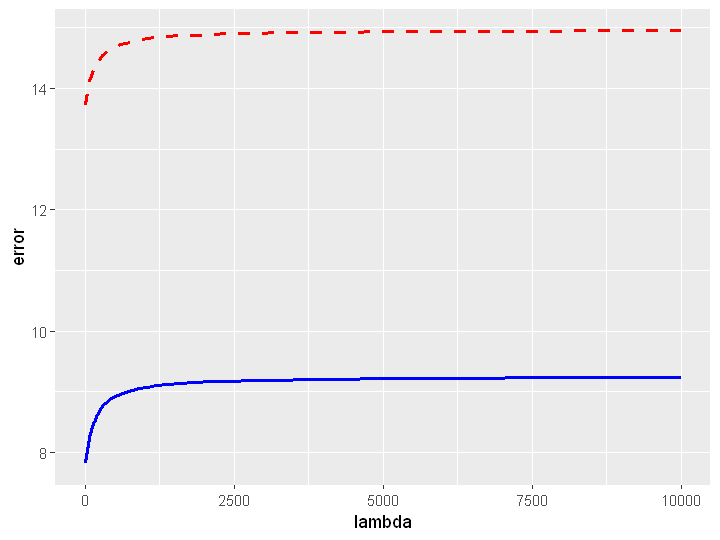

In [48]:
data.f=data.frame("lambda"=grid, "test.error"=prediction.error,"train.error"=training.error)
ggplot(data.f, aes(x=lambda,y=error, color=data.f)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
  geom_line(aes(y = train.error),color = "blue", size=1)+ 
  theme_grey()

### d) Replaceing one of the covariates with a constant equal to -10

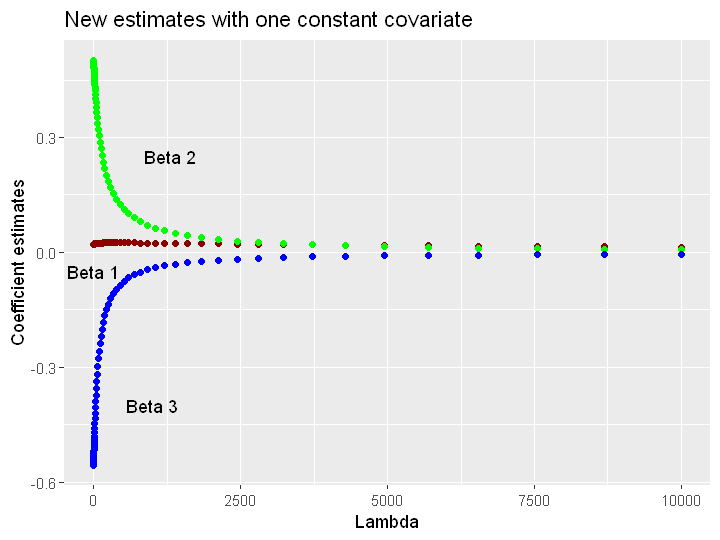

In [49]:
x.new=X
x.new[,1]=rep(-10,n)


ridge.coef.new=matrix(rep(NA,3*length(grid)),nrow=3,ncol=length(grid))


for (i in 1:length(grid)){
  ridge.coef.new[,i]=ridge.mod(lambda=grid[i],X=x.new,Y=Y)
}


df=data.frame("lambda"=grid, "beta1"=ridge.coef.new[1,],"beta2"=ridge.coef.new[2,],"beta3"=ridge.coef.new[3,])
ggplot(df, aes(x=lambda)) + 
  geom_point(aes(y = beta1), color = "darkred") + 
  geom_point(aes(y = beta2),color="green" ) +
  geom_point(aes(y = beta3), color="blue") + annotate("text", x=0, y= -0.05, label="Beta 1")+
        annotate("text", x=1300, y=0.25, label="Beta 2")+
        annotate("text", x=1000, y=-0.40, label="Beta 3")+
ggtitle("New estimates with one constant covariate")+
xlab("Lambda")+
ylab("Coefficient estimates") 
        
  





In [21]:
ridge.coef.new

0.02082714,0.02082785,0.02082796,0.02082809,0.02082823,0.0208284,0.02082859,0.02082881,0.02082906,0.02082935,...,0.02088536,0.02022950,0.01952051,0.01876087,0.017954321,0.017105937,0.016222059,0.015310190,0.014378787,0.013436987
0.50130321,0.50126822,0.50126292,0.50125683,0.50124980,0.5012417,0.50123241,0.50122169,0.50120935,0.50119514,...,0.02568578,0.02246414,0.01962918,0.01713862,0.014953822,0.013039701,0.011364609,0.009900145,0.008620929,0.007504374
-0.55598650,-0.55592071,-0.55591075,-0.55589928,-0.55588608,-0.5558709,-0.55585337,-0.55583322,-0.55581002,-0.55578332,...,-0.01568930,-0.01369480,-0.01195025,-0.01042531,-0.009093024,-0.007929533,-0.006913784,-0.006027240,-0.005253618,-0.004578638


Here, we can see that the estimated effect of the constant covariate is closer to the zero

### e) Determining the optimal lambda from a 10-fold cross-validation using glmnet

In [22]:
## ridge model, using internal commands to perform 10 fold cross validation

set.seed(12)
library(glmnet)
cv.out <- cv.glmnet(X,Y,alpha = 0)
bestlam <- cv.out$lambda.min
bestlam
cv.out

[1] 0.5201032


Call:  cv.glmnet(x = X, y = Y, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min   0.52    80   11.28 0.9938       3
1se  59.80    29   12.28 1.2308       3

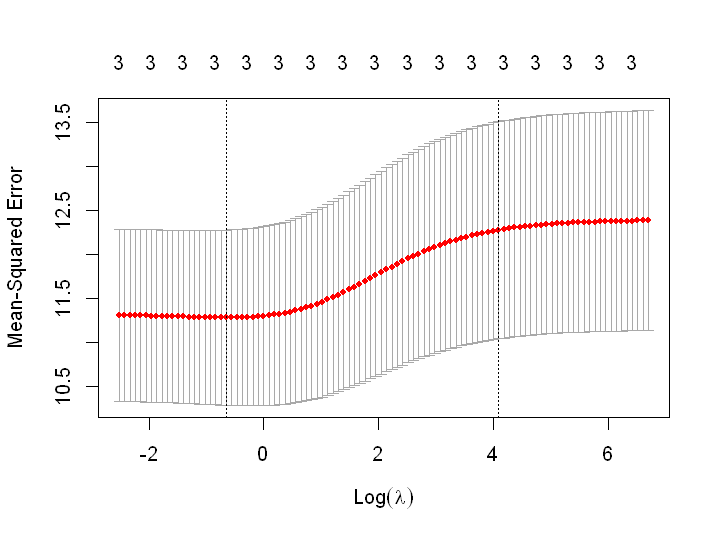

In [23]:
 plot(cv.out)


In [24]:
# plot(ridge.glm, xvar = "lambda")
# options(repr.plot.width=4, repr.plot.height=3)



# Exercise 2
# Simulation Study

In [25]:
### Exercise 2 
### Part a

set.seed(12)
rep=100
### setting storage
pred.error=matrix(rep(NA,rep*length(grid)),nrow=rep,ncol=length(grid))
prediction.error=c(rep(NA,length(grid)))
ridge.coef.train=matrix(rep(NA,p*length(grid)),nrow=3,ncol=length(grid))


simulation=function(VarCov){
for (i in 1:rep){
  data=mydata(n=100,mu=rep(0,3),VarCov,mu.u=0, sigma.u=10)
  X=data[,-4]
  Y=data[,4]
  train=sample(1:nrow(X),nrow(X)/2)
  test=-train
  Y.test=Y[test]
  for (a in 1:length(grid)){
    ridge.coef.train[,a]=ridge.mod(lambda=grid[a],X=X[train,],Y=Y[train])
  }
  for (b in 1:length(grid)){
    prediction.error[b]=mean((Y.test-X[test,]%*%ridge.coef.train[,b])^2)
  }
  pred.error[i,]=prediction.error
  
}
  return(pred.error)
}

In [26]:
test.error=simulation(VarCov=Variance.cov)
head(test.error)
dim(test.error)
Variance.cov

10.253341,10.253195,10.253173,10.253148,10.253119,10.253085,10.253046,10.253002,10.252950,10.252891,...,11.216095,11.224394,11.231673,11.238049,11.243629,11.248506,11.252765,11.256483,11.259726,11.262553
11.143236,11.143189,11.143182,11.143173,11.143164,11.143153,11.143141,11.143126,11.143110,11.143091,...,12.905932,12.922316,12.936723,12.949373,12.960464,12.970176,12.978672,12.986097,12.992580,12.998238
8.035522,8.035507,8.035504,8.035502,8.035499,8.035495,8.035491,8.035486,8.035481,8.035475,...,9.647935,9.663363,9.676951,9.688897,9.699383,9.708575,9.716623,9.723662,9.729813,9.735184
10.759549,10.759393,10.759370,10.759343,10.759312,10.759276,10.759234,10.759187,10.759132,10.759069,...,10.875657,10.888062,10.899061,10.908787,10.917366,10.924920,10.931559,10.937385,10.942490,10.946959
11.674299,11.674392,11.674406,11.674422,11.674440,11.674462,11.674487,11.674515,11.674548,11.674585,...,14.100755,14.117981,14.133110,14.146379,14.158001,14.168170,14.177059,14.184822,14.191598,14.197508
9.339361,9.338934,9.338870,9.338795,9.338710,9.338611,9.338498,9.338367,9.338217,9.338044,...,9.898498,9.915101,9.929788,9.942751,9.954168,9.964205,9.973016,9.980739,9.987501,9.993415


[1] 100 100

2.00000000,0.10000000,0.02828427
0.10000000,2.00000000,0.04242641
0.02828427,0.04242641,1.00000000


[1] 62

[1] 47.14866

Warning message:
"Removed 20 row(s) containing missing values (geom_path)."

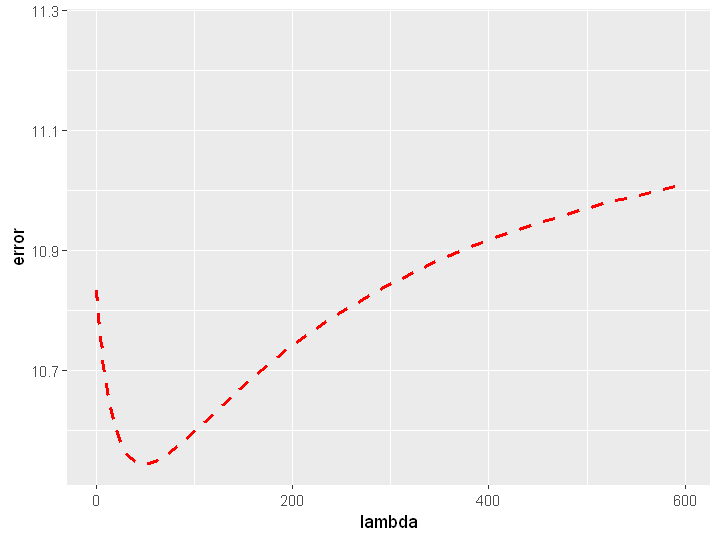

In [27]:
mean.test.error=colMeans(test.error)
which(mean.test.error==min(mean.test.error))
grid[which(mean.test.error==min(mean.test.error))]
data.f=data.frame("lambda"=grid, "test.error"=mean.test.error)
ggplot(data.f, aes(x=lambda,y=error)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
 scale_x_continuous(limits=c(0, grid[80]))+
  theme_grey()


In [28]:
#### multicollinearity

In [29]:
Var1=2
Var2=2
Var3=1
Corr12=0.8
Corr13=0.85
Corr23=0.90

Cov12=Corr12*sqrt(Var1)*sqrt(Var2)
Cov13=Corr13*sqrt(Var1)*sqrt(Var3)
Cov23=Corr23*sqrt(Var2)*sqrt(Var3)
Variance.cov.new=matrix(c(Var1,Cov12,Cov13,Cov12,Var2,Cov23,Cov13,Cov23,Var3),nrow=3,ncol=3,byrow=TRUE)
mean.pred.error.new=simulation(VarCov=Variance.cov.new)
which(colMeans(mean.pred.error.new)==min(colMeans(mean.pred.error.new)))
grid[which(colMeans(mean.pred.error.new)==min(colMeans(mean.pred.error.new)))]
Variance.cov.new


[1] 66

[1] 82.86428

2.000000,1.600000,1.202082
1.600000,2.000000,1.272792
1.202082,1.272792,1.000000


Warning message:
"Removed 20 row(s) containing missing values (geom_path)."

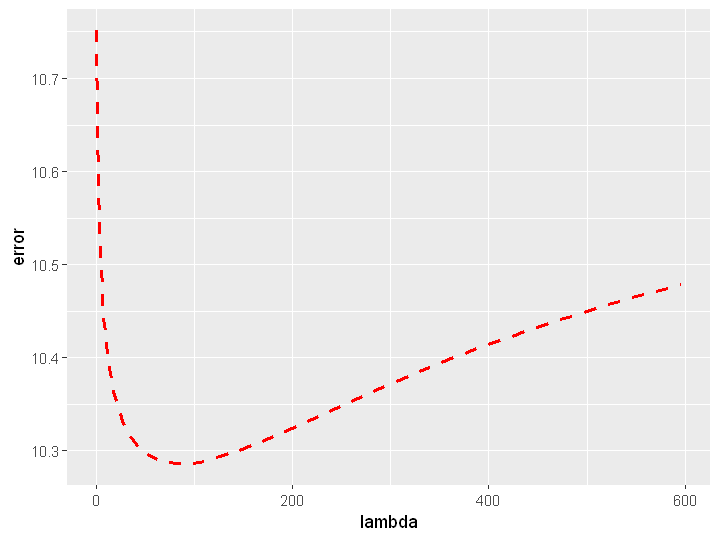

In [30]:

data.f=data.frame("lambda"=grid, "test.error"=colMeans(mean.pred.error.new))
ggplot(data.f, aes(x=lambda,y=error)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
  scale_x_continuous(limits=c(0, grid[80]))+
  theme_grey()

[1] 255.9548

Warning message:
"Removed 20 row(s) containing missing values (geom_path)."

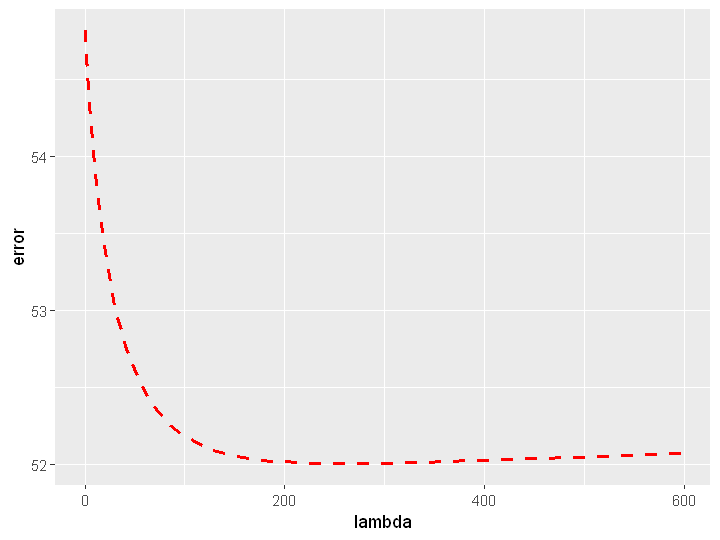

In [50]:
set.seed(100)
rep=100
pred.error=matrix(rep(NA,rep*length(grid)),nrow=rep,ncol=length(grid))
prediction.error=c(rep(NA,length(grid)))
ridge.coef.train=matrix(rep(NA,3*length(grid)),nrow=3,ncol=length(grid))

simulation=function(VarCov){
  for (i in 1:rep){
    data=mydata(n=100,mu=rep(0,3),VarCov,mu.u=0, sigma.u=50)
    X=data[,-4]
    Y=data[,4]
    train=sample(1:nrow(X),nrow(X)/2)
    test=-train
    Y.test=Y[test]
    for (a in 1:length(grid)){
      ridge.coef.train[,a]=ridge.mod(lambda=grid[a],X=X[train,],Y=Y[train])
    }
    for (b in 1:length(grid)){
      prediction.error[b]=mean((Y.test-X[test,]%*%ridge.coef.train[,b])^2)
    }
    pred.error[i,]=prediction.error
    
  }
  return(pred.error)
}

library(ggplot2)

mean.pred.error=colMeans(simulation(VarCov=Variance.cov))
grid[which(mean.pred.error==min(mean.pred.error))]

data.f=data.frame("lambda"=grid, "test.error"=mean.pred.error)
ggplot(data.f, aes(x=lambda,y=error)) + 
  geom_line(aes(y = test.error),linetype="dashed", color = "red", size=1)+ 
scale_x_continuous(limits=c(0, grid[80]))+ 
theme_grey()

### Alternatively, we can change the variance of the error terms, and for this case, we have slightly different scenario. In this case the optimal lambda increases.  We changed the variance from 10 to 50, and found the optimal lambda in the index of 75

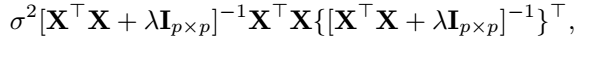

In [51]:
grid[which(mean.pred.error==min(mean.pred.error))]

[1] 255.9548